# importar recursos

In [1]:
#!pip install -U spacy
#!python -m spacy download es_core_news_sm
#!python -m spacy download es_core_news_lg
#!pip install torch
#!pip install torchvision
#!pip install transformers
#!pip install beautifulsoup4
#!pip install wordcloud
#!pip install gensim
#!pip install pandas
#!pip install lime

In [4]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

# Bases de datos periodico la republica 

In [13]:
# Lista de URLs de la base de datos la republica
BASE_DATOS_republica= [
"https://www.larepublica.co/analisis/eduardo-verano-de-la-rosa-500119/cultura-de-paz-3698259",
"https://www.larepublica.co/redirect/post/3623164",
"https://www.larepublica.co/redirect/post/3601143",
"https://www.larepublica.co/redirect/post/3598667",
"https://www.larepublica.co/redirect/post/3562175",
"https://www.larepublica.co/redirect/post/3556130",
"https://www.larepublica.co/redirect/post/3554692", 
'https://www.larepublica.co/redirect/post/3506176',
'https://www.larepublica.co/redirect/post/3416992',
'https://www.larepublica.co/redirect/post/3314881',
'https://www.larepublica.co/redirect/post/3338805',
'https://www.larepublica.co/redirect/post/3247123',
'https://www.larepublica.co/redirect/post/3109678',
'https://www.larepublica.co/redirect/post/3096518',
'https://www.larepublica.co/analisis/eduardo-verano-de-la-rosa-500119/seguridad-democracia-y-autonomia-3771099',
'https://www.larepublica.co/analisis/juan-fernando-samudio-3439437/viva-la-libertad-carajo-3770406',
'https://www.larepublica.co/analisis/jair-viana-3249842/economia-en-libertad-3762492',
'https://www.larepublica.co/analisis/jonathan-malagon-2590707/libertad-de-elegir-3755576',
'https://www.larepublica.co/analisis/camilo-guzman-3193497/mas-alla-del-voto-3741063',
'https://www.larepublica.co/analisis/juan-pablo-lievano-vegalara-2858000/libertad-de-prensa-bastion-democratico-3723144',
'https://www.larepublica.co/analisis/jair-viana-3249842/un-trago-de-libertad-3680575',
'https://www.larepublica.co/analisis/alejandro-moreno-salamanca-3028147/libertad-y-felicidad-3652226',
'https://www.larepublica.co/analisis/camilo-guzman-3193497/el-cuidado-de-la-libertad-3646506',
'https://www.larepublica.co/analisis/camilo-guzman-3193497/libertad-clave-ignorada-3640718',
'https://www.larepublica.co/analisis/ciro-gomez-ardila-400547/no-nos-ofendamos-3627563',
'https://www.larepublica.co/analisis/ciro-gomez-ardila-400547/miedo-a-disentir-3592247',
'https://www.larepublica.co/analisis/antonini-de-jimenez-3557435/liberofobia-3557432',
'https://www.larepublica.co/analisis/juan-david-garcia-vidal-libertank-3136810/la-libertad-cuesta-3508093',
'https://www.larepublica.co/analisis/eduardo-verano-de-la-rosa-500119/estado-de-derecho-y-libertades-3482374',
'https://www.larepublica.co/analisis/natalia-zuleta-3133531/de-cuantos-velos-nos-debemos-liberar-las-mujeres-3462356',
'https://www.larepublica.co/analisis/gustavo-moreno-montalvo-2565659/la-libertad-proposito-necesario-3386737',
'https://www.larepublica.co/analisis/beatriz-eugenia-campillo-velez-libertank-3146861/elijamos-la-libertad-3384417',
'https://www.larepublica.co/analisis/julio-mejia-3274016/la-justicia-y-la-libertad-3273806',
'https://www.larepublica.co/analisis/julian-arevalo-2721470/radiografia-de-la-democracia-3254346',
'https://www.larepublica.co/analisis/juan-pablo-lievano-vegalara-2858000/libertad-de-prensa-bastion-democratico-3723144',
'https://www.larepublica.co/analisis/luis-guillermo-echeverri-velez-3075852/desesperanza-democratica-en-el-mar-de-las-soberbias-3722171',
'https://www.larepublica.co/analisis/eduardo-verano-de-la-rosa-500119/reglas-de-la-democracia-3720876',
'https://www.larepublica.co/analisis/alfredo-sarmiento-narvaez-3420523/paz-sectaria-paz-democratica-3598667',
'https://www.larepublica.co/analisis/alfredo-sarmiento-narvaez-3420523/oposicion-para-mas-y-mejor-democracia-3589316',
'https://www.larepublica.co/analisis/alfredo-sarmiento-narvaez-3420523/democracia-con-aroma-de-cafe-3567493',
'https://www.larepublica.co/analisis/german-bolivar-blanco-2825947/democracia-atemorizada-3553400',
'https://www.larepublica.co/analisis/eduardo-verano-de-la-rosa-500119/democracia-y-ciudadania-3546879',
'https://www.larepublica.co/analisis/gustavo-moreno-montalvo-2565659/capitalismo-y-democracia-3523039',
'https://www.larepublica.co/analisis/juan-manuel-nieves-r-534481/la-pugna-por-la-democracia-3509911',
'https://www.larepublica.co/analisis/juan-pablo-lievano-vegalara-2858000/oda-al-capitalismo-y-a-la-democracia-liberal-3454873',
'https://www.larepublica.co/analisis/santiago-castro-gomez-513871/las-democracias-liberales-3452038',
'https://www.larepublica.co/analisis/rodolfo-correa-3159692/la-era-de-la-inseguridad-democratica-3444500',
'https://www.larepublica.co/analisis/luis-felipe-gomez-restrepo-2524772/ciudadania-para-la-democracia-3440717',
'https://www.larepublica.co/analisis/rodrigo-botero-montoya-500048/retroceso-democratico-3398259',
'https://www.larepublica.co/analisis/julian-arevalo-2721470/radiografia-de-la-democracia-3254346',
'https://www.larepublica.co/analisis/luis-felipe-gomez-restrepo-2524772/desencanto-de-las-democracias-3242308',
'https://www.larepublica.co/analisis/eduardo-verano-de-la-rosa-500119/democracia-y-partidos-politicos-3233000',
'https://www.larepublica.co/analisis/sharon-hernandez-2917023/democracia-y-nueva-normalidad-3109294',
'https://www.larepublica.co/analisis/luis-perez-gutierrez-2991901/la-valija-vacia-de-la-democracia-3082692',
'https://www.larepublica.co/analisis/jorge-hernan-pelaez-500047/a-luchar-por-la-justicia-3771857',
'https://www.larepublica.co/analisis/p-harold-castilla-devoz-2912463/que-la-justicia-y-la-paz-fluyan-3700395',
'https://www.larepublica.co/analisis/andres-felipe-londono-3399332/la-justicia-social-de-petro-3618120',
'https://www.larepublica.co/analisis/andres-felipe-londono-3399332/que-es-la-justicia-3611024',
'https://www.larepublica.co/analisis/carlos-ronderos-533356/violencia-y-justicia-3594676',
'https://www.larepublica.co/analisis/cesar-mauricio-rodriguez-zarate-3545376/no-hay-seguridad-sin-justicia-3574934',
'https://www.larepublica.co/analisis/gustavo-moreno-montalvo-2565659/camino-para-la-paz-3566281',
'https://www.larepublica.co/analisis/mauricio-tobon-3044910/y-ahora-quien-podra-defendernos-3562079',
'https://www.larepublica.co/analisis/luis-felipe-gomez-restrepo-2524772/como-aportar-a-la-paz-total-3562175',
'https://www.larepublica.co/analisis/carlos-ronderos-533356/paz-3556130',
'https://www.larepublica.co/analisis/andres-otero-leongomez-2834704/justicia-prostituida-3500162',
'https://www.larepublica.co/analisis/camilo-guzman-3193497/justicia-social-3431553',
'https://www.larepublica.co/analisis/gustavo-moreno-montalvo-2565659/instituciones-y-justicia-hoy-3330264',
'https://www.larepublica.co/analisis/eric-tremolada-506119/lecciones-de-la-guerra-3324276',
'https://www.larepublica.co/analisis/juan-pablo-lievano-vegalara-2858000/estado-de-derecho-bien-necesario-3274540',
'https://www.larepublica.co/analisis/julio-mejia-3274016/la-justicia-y-la-libertad-3273806',
'https://www.larepublica.co/analisis/vicente-echandia-3155988/clamor-ciudadano-por-la-justicia-3249780',
'https://www.larepublica.co/analisis/luis-guillermo-velez-cabrera-402232/justicia-sin-justicia-3235971',
'https://www.larepublica.co/analisis/dr-william-aristizabal-3226831/un-pais-de-leyes-donde-falta-justicia-3226830',
'https://www.larepublica.co/analisis/gustavo-moreno-montalvo-2565659/para-tener-justicia-3198793',
'https://www.larepublica.co/analisis/lucas-gomez-3140264/cuando-la-justicia-se-politiza-cruje-el-estado-de-derecho-3140256',
'https://www.larepublica.co/analisis/hector-schamis-2852043/justicia-retrasada-es-justicia-denegada-3099187',
'https://www.larepublica.co/analisis/juan-david-enciso-congote-2913442/los-limites-de-la-justicia-3086716'
]

# Lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "La republica"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_republica:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

     # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all(class_="html-content")

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer autor
    autor_div = soup.find("div", class_="autorCargo")
    autor = autor_div.find("a", class_="analistaName").text.strip() if autor_div and autor_div.find("a", class_="analistaName") else "Autor no encontrado"

    # Extraer fecha de publicación
    fecha_span = soup.find("span", class_="date-news")
    fecha = fecha_span.text.strip() if fecha_span else "Fecha no encontrada"

    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)

# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoslarepublica_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)

                         Autor Fecha de Publicación  Número de Palabras  \
0    Eduardo Verano de la Rosa           07/09/2023                 565   
1        Juan Manuel Nieves R.           26/05/2023                 487   
2        Juan Fernando Samudio           26/04/2023                 566   
3    Alfredo Sarmiento Narváez           22/04/2023                 511   
4   Luis Felipe Gómez Restrepo           07/03/2023                 608   
..                         ...                  ...                 ...   
72     Dr. William Aristizábal           03/09/2021                 648   
73     Gustavo Moreno Montalvo           10/07/2021                 525   
74                 Lucas Gómez           17/03/2021                 646   
75              Hector Schamis           09/12/2020                1086   
76   Juan David Enciso Congote           10/11/2020                 542   

   Nombre del Periódico  
0          La republica  
1          La republica  
2          La republi

# Analisis descriptivo

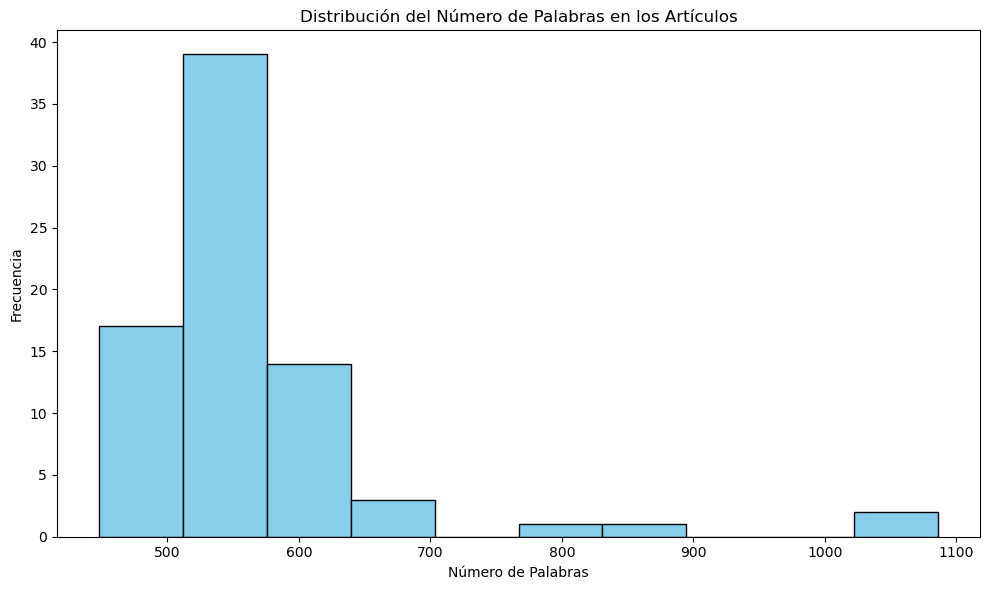

In [14]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

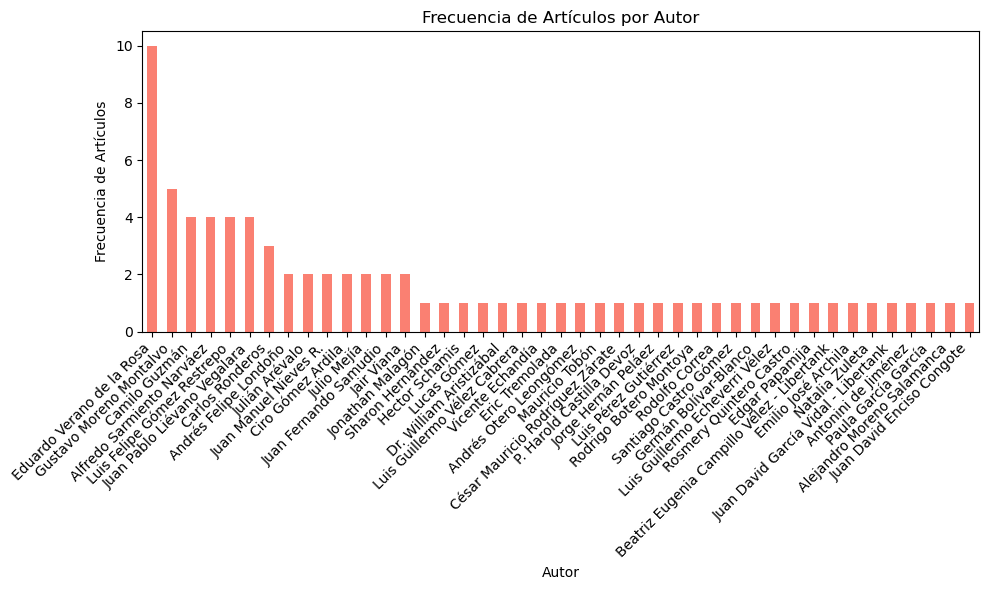

In [15]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Función para convertir la fecha al formato DD/MM/YYYY
def convertir_a_formato_completo(fecha):
    return pd.to_datetime(fecha, format='%d/%m/%Y').strftime('%Y-%m-%d %H:%M:%S')

# Aplicar la conversión de fechas
df['Fecha de Publicación'] = df['Fecha de Publicación'].apply(convertir_a_formato_completo)

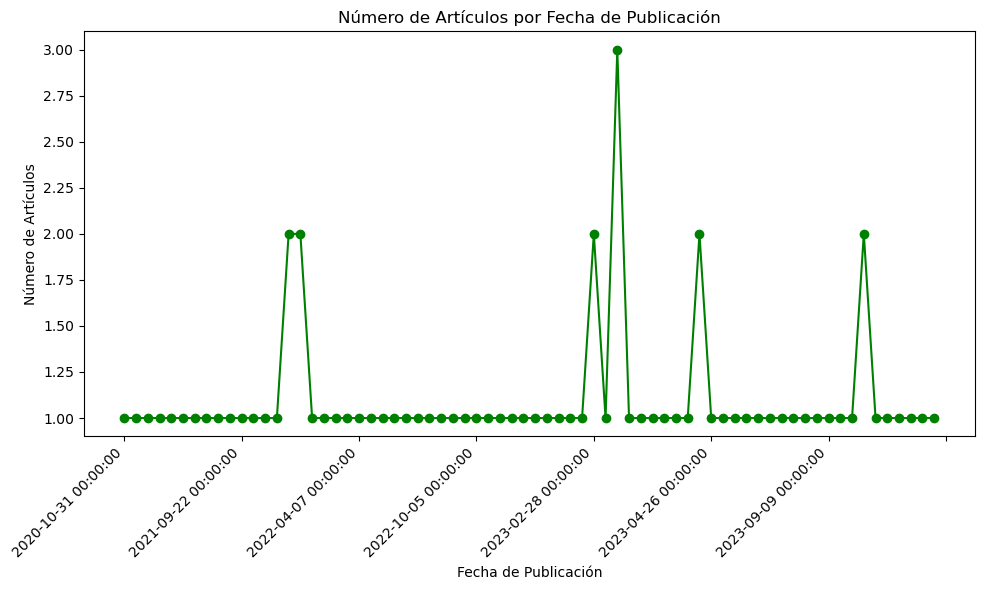

In [17]:
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Write the data to a CSV file using csv.writer
with open('datos_extraidoslarepublica_descriptivo_COMPLETO.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Write the header
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Write the data
    for index, row in df.iterrows():
        escritor_csv.writerow(row.values)
